In [1]:
#PROJECT 
from IPython.display import Image
Image(url='https://media.giphy.com/media/0ozmBje9bTxfPlKO7m/giphy.gif')

# 1.Source Code 

1.1 import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import arabic_reshaper
import matplotlib.pyplot as plt
import sys
sns.set_theme(style="darkgrid")   
%matplotlib inline 

1.2 read xlsx file and clean 

In [3]:
excel_file = 'C:/Users/Ghaida/Desktop/SDAIA/students.xlsx'
data = pd.read_excel(excel_file)
data.head()

,المنطقة الإدارية,إدارة التعليم,المكتب,السلطة,المرحلة,جنس الطالب,عدد الطلبة ذوي الإعاقة للعام 1442ه
0,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الإبتدائية,بنين,27
1,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الثانوية,بنين,6
2,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة المتوسطة,بنين,7
3,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالمخواة,حكومي,المرحلة الإبتدائية,بنات,30
4,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالمخواة,حكومي,المرحلة الثانوية,بنات,16


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   المنطقة الإدارية                    1474 non-null   object
 1   إدارة التعليم                       1474 non-null   object
 2   المكتب                              1474 non-null   object
 3   السلطة                              1474 non-null   object
 4   المرحلة                             1474 non-null   object
 5   جنس الطالب                          1474 non-null   object
 6   عدد الطلبة ذوي الإعاقة للعام 1442ه  1474 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 80.7+ KB


In [5]:
data.isna().sum()

المنطقة الإدارية                      0
إدارة التعليم                         0
المكتب                                0
السلطة                                0
المرحلة                               0
جنس الطالب                            0
عدد الطلبة ذوي الإعاقة للعام 1442ه    0
dtype: int64

In [6]:
data.duplicated().sum()

0

1.3 rename columns names 

In [7]:
data = data.rename(columns = {'المنطقة الإدارية': 'region', 'جنس الطالب': 'sex' , 'عدد الطلبة ذوي الإعاقة للعام 1442ه' : 'num_std' , 'المرحلة' : 'intervals' ,'السلطة':'type'})

In [8]:
data.head()

,region,إدارة التعليم,المكتب,type,intervals,sex,num_std
0,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الإبتدائية,بنين,27
1,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الثانوية,بنين,6
2,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة المتوسطة,بنين,7
3,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالمخواة,حكومي,المرحلة الإبتدائية,بنات,30
4,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالمخواة,حكومي,المرحلة الثانوية,بنات,16


1.4 replace data 

In [9]:
print(data.sex.value_counts()) #To know how many values names I have it  
data['new_sex'] = data["sex"].replace({'بنين' : 'male' , 'بنات' : 'female'} , inplace=False)


بنين    826
بنات    648
Name: sex, dtype: int64


In [10]:
print(data.region.value_counts())
data['new_region'] = data["region"].replace({'الرياض' : 'riyadh' , 'مكة المكرمة' : 'mecca' , 'عسير' : 'asser' , 'الشرقية' : 'sharqia' , 'القصيم' : 'qassim' , 'جازان' : 'jazan' , 'المدينة المنورة' : 'medina' , 'حائل' : 'hail' , 'الباحة' : 'al-baha' , 'تبوك' : 'tabuk' , 'الجوف' : 'al-jouf' , 'نجران' : 'najran' , 'الحدود الشمالية':'al-shamal'} , inplace=False)


الرياض             288
مكة المكرمة        287
عسير               177
الشرقية            159
القصيم             115
جازان               96
المدينة المنورة     88
حائل                67
الباحة              53
تبوك                47
الجوف               39
نجران               32
الحدود الشمالية     26
Name: region, dtype: int64


In [11]:
print(data.intervals.value_counts())
data['new_intervals'] = data["intervals"].replace({'المرحلة الإبتدائية' : 'primary-EDU' , 'المرحلة المتوسطة' : 'midlle-EDU' , 'المرحلة الثانوية' : 'high-EDU'} , inplace=False)


المرحلة الإبتدائية    607
المرحلة المتوسطة      452
المرحلة الثانوية      415
Name: intervals, dtype: int64


In [12]:
print(data.type.value_counts())
data['new_type'] = data["type"].replace({'حكومي' : 'public_EDU' , 'أهلي' : 'private_EDU' , 'تعليم اجنبي' : 'glopal_EDU' , 'الهيئة الملكية' : 'royalcommission_EDU' } , inplace=False)


حكومي             1197
أهلي               242
تعليم اجنبي         29
الهيئة الملكية       6
Name: type, dtype: int64


In [13]:
data.head()

,region,إدارة التعليم,المكتب,type,intervals,sex,num_std,new_sex,new_region,new_intervals,new_type
0,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الإبتدائية,بنين,27,male,al-baha,primary-EDU,public_EDU
1,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الثانوية,بنين,6,male,al-baha,high-EDU,public_EDU
2,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة المتوسطة,بنين,7,male,al-baha,midlle-EDU,public_EDU
3,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالمخواة,حكومي,المرحلة الإبتدائية,بنات,30,female,al-baha,primary-EDU,public_EDU
4,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالمخواة,حكومي,المرحلة الثانوية,بنات,16,female,al-baha,high-EDU,public_EDU


1.5 drop unnecessary columns

In [14]:
data.drop(data.columns[[0,1,2,3,4,5]], axis=1 , inplace=True)

In [15]:
data

,num_std,new_sex,new_region,new_intervals,new_type
0,27,male,al-baha,primary-EDU,public_EDU
1,6,male,al-baha,high-EDU,public_EDU
2,7,male,al-baha,midlle-EDU,public_EDU
3,30,female,al-baha,primary-EDU,public_EDU
4,16,female,al-baha,high-EDU,public_EDU
...,...,...,...,...,...
1469,21,male,najran,primary-EDU,private_EDU
1470,164,female,najran,primary-EDU,public_EDU
1471,4,male,najran,primary-EDU,public_EDU
1472,27,female,najran,high-EDU,public_EDU


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num_std        1474 non-null   int64 
 1   new_sex        1474 non-null   object
 2   new_region     1474 non-null   object
 3   new_intervals  1474 non-null   object
 4   new_type       1474 non-null   object
dtypes: int64(1), object(4)
memory usage: 57.7+ KB


# 2.Data Visulaization

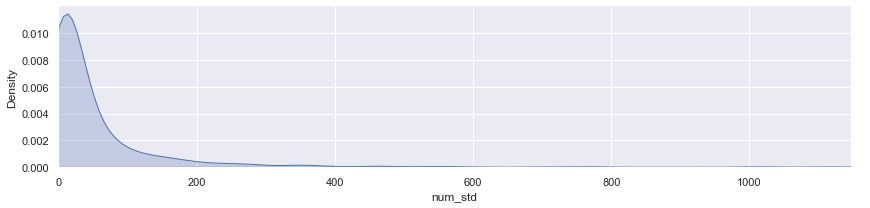

In [17]:
# the seaborn graph it's for view the number of disabled students 
fig = sns.FacetGrid(data,aspect=4)
fig.map(sns.kdeplot,'num_std',shade= True)
oldest = data['num_std'].max()
fig.set(xlim=(0,oldest))
fig.add_legend(); #the semicolon (;) it's for hide graph type  

C:\Users\Ghaida\anaconda3400\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


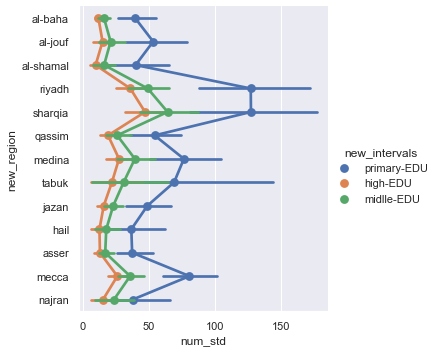

In [18]:
# Disparity of proportions of all intervals in regions 
sns.factorplot(x ='num_std', y ='new_region', hue = 'new_intervals', data = data )
plt.show(); 

male      0.56038
female    0.43962
Name: new_sex, dtype: float64


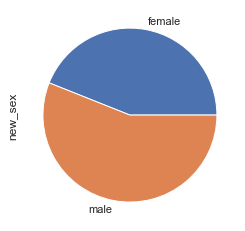

In [19]:
sex_ser = data.groupby('new_sex').new_sex.count().plot(kind='pie')
print(data.new_sex.value_counts(normalize=True)) # using for know percentage of male and female disabled students 

#male => 0.56% 
#female => 0.44% 

In [20]:
data.describe()

,num_std
count,1474.000000
mean,50.449118
std,101.915506
min,1.000000
25%,5.000000
50%,15.500000
75%,49.000000
max,1147.000000


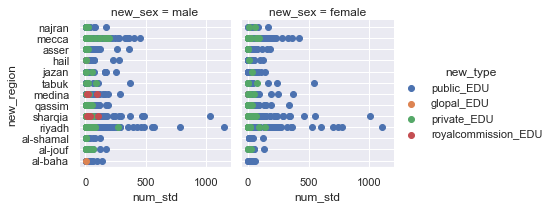

In [21]:
# this graph for determine and showing school type to detect city have all this 4 types 
graph = sns.FacetGrid(data, col ="new_sex",  hue ="new_type")
graph.map(plt.scatter, "num_std", "new_region").add_legend()
plt.show()

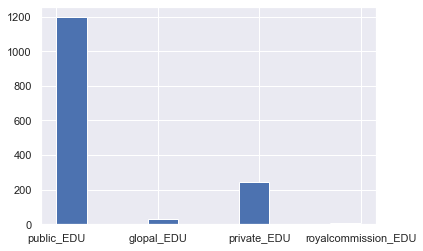

In [22]:
# what school type geted the more of disabled students 
data['new_type'].hist();

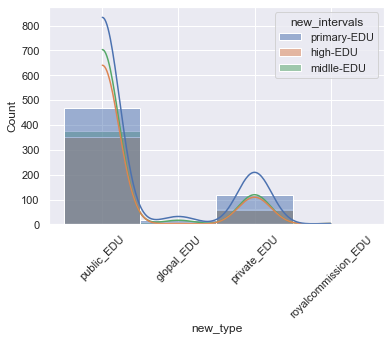

In [23]:
ax=sns.histplot(data = data, x = "new_type", kde = True, hue = "new_intervals")
ax.tick_params(axis='x', rotation=45)

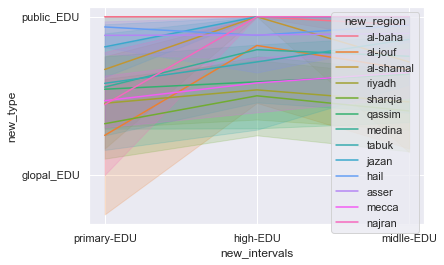

In [24]:
#The realtion between regions and school type 
sns.lineplot(x="new_intervals", y="new_type", hue="new_region",data=data);

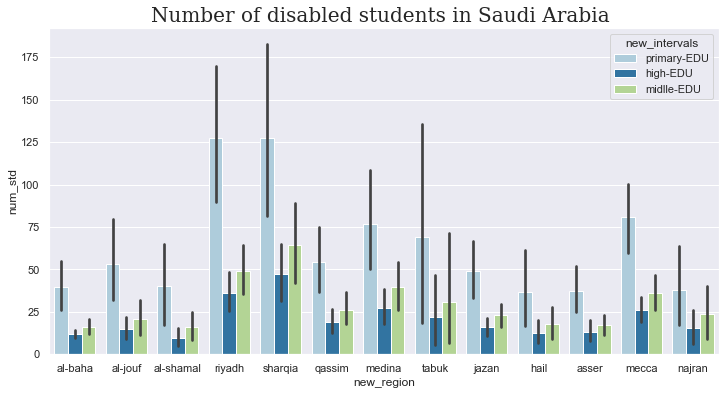

In [25]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(x="new_region", y="num_std", hue="new_intervals",data=data, palette="Paired")
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Number of disabled students in Saudi Arabia ', fontsize = 20,family = 'serif')
plt.show()